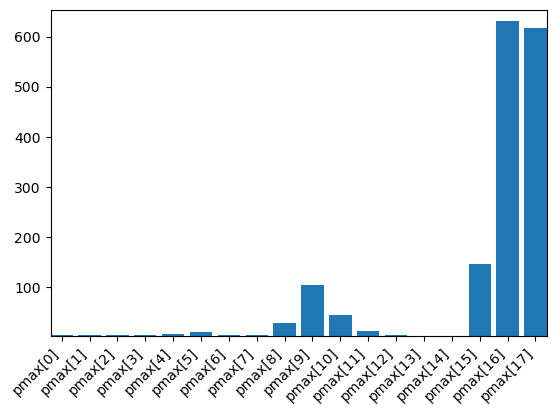

In [21]:
import pandas
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

development = pandas.read_csv("./../../DSL_Winter_Project_2024/development.csv")


pmax_features = []
negpmax_features = []
tmax_features = []
area_features = []
rms_features = []

for i in range(0, 18):
    pmax_features.append("pmax[%s]" % (i))
    negpmax_features.append("negpmax[%s]" % (i))
    tmax_features.append("tmax[%s]" % (i))
    area_features.append("area[%s]" % (i))
    rms_features.append("rms[%s]" % (i))

df = development[pmax_features].head(100)

bar_width=0.4
bar_padding=0.1
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
bar_positions = [i * (bar_width + bar_padding) for i in range(len(df.columns))]
ax.set_xlim(0, len(df.columns) - 1)
ax.set_ylim(df.values.min(), df.values.max() + 1)

bars = ax.bar(bar_positions, [0] * len(df.columns), width=bar_width, tick_label=pmax_features)

# update function
def update(frame):
    heights = df.iloc[frame].values
    for bar, height, position in zip(bars, heights, bar_positions):
        bar.set_height(height)
        bar.set_x(position - bar_width / 2) # fix the position of each bar
    return bars

ax.set_xlim(min(bar_positions) - bar_width / 2, max(bar_positions) + bar_width / 2)

plt.xticks(rotation=45, ha='right')
animation = FuncAnimation(fig, update, frames=len(df), interval=500, blit=True)
#plt.tight_layout()
#plt.show()

html_output = animation.to_jshtml()
HTML(html_output)
#animation.save('animation.mp4', writer='Pillow')

In [7]:
df.head(100)

,x,y,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],area[1],...,pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
0,200.0,200.0,4.066907,-17.690173,2.847932,0.600000,2.007042,5.409161,-17.721210,4.538778,...,607.109118,-36.282996,583.899899,72.373094,0.374498,614.916861,-39.848523,591.852768,72.331028,0.405595
1,200.0,200.0,5.916801,-4.717111,5.792778,79.765174,1.564535,4.414289,-4.736827,3.720435,...,630.348007,-39.715988,580.042799,71.029155,0.403258,624.950701,-41.266681,586.569646,71.089058,0.405890
2,200.0,200.0,4.286652,-5.316132,2.356390,74.600000,1.404622,4.567191,-5.985437,3.490490,...,613.880342,-40.679678,580.407491,71.892264,0.568777,596.437125,-42.712286,574.091695,71.943934,0.498019
3,200.0,200.0,4.003635,-4.617459,2.189005,43.000000,1.512162,5.019058,-4.229949,6.786200,...,600.714957,-43.206601,579.882635,72.357388,0.255483,591.763739,-50.681940,584.099483,72.333282,0.336454
4,200.0,200.0,4.448146,-4.848743,3.997002,196.667482,1.101113,3.250262,-5.783587,2.449456,...,609.723785,-43.570892,590.156125,71.249130,0.413855,606.917023,-49.923819,584.316142,71.242904,0.293824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,200.0,200.0,3.542514,-6.130276,1.381577,200.800000,1.225717,5.480286,-5.707764,3.218518,...,608.877937,-43.427533,594.182455,72.501631,0.441946,588.013596,-49.718781,582.999362,72.529976,0.418243
96,200.0,200.0,5.098668,-3.838733,8.338574,184.265369,2.006402,4.689171,-3.974799,7.807107,...,601.693135,-44.598685,571.691310,72.394116,0.515754,622.350893,-50.325604,579.783720,72.421199,0.373278
97,200.0,200.0,5.058289,-4.564331,2.438062,183.400000,1.819393,5.267896,-3.513904,4.625955,...,607.588512,-42.348975,579.607542,71.052842,0.367708,607.178100,-44.706427,594.025887,71.351538,0.450708
98,200.0,200.0,3.946158,-4.157749,3.254411,32.800000,1.323968,4.610303,-4.512622,3.418315,...,602.260299,-43.128110,592.312346,71.377572,0.368394,608.008331,-42.702090,581.536418,71.576500,0.398862


In [29]:
from scipy.stats import zscore
pmax_df = development[pmax_features]
df_score = pmax_df.apply(zscore, axis=0)
count_gt_threshold = df_score.apply(lambda x: (abs(x) > 1.5).sum()).nlargest(6)
count_gt_threshold

pmax[15]    51567
pmax[17]    45736
pmax[16]    45245
pmax[3]     44091
pmax[10]    42341
pmax[11]    41035
dtype: int64

In [31]:
negpmax_df = development[negpmax_features]
df_score = negpmax_df.apply(zscore, axis=0)
count_gt_threshold = df_score.apply(lambda x: (abs(x) > 1.5).sum()).nlargest(6)
count_gt_threshold

negpmax[17]    48133
negpmax[16]    46896
negpmax[5]     41009
negpmax[6]      6233
negpmax[1]      1039
negpmax[13]      697
dtype: int64

In [35]:
tmax_df = development[tmax_features]
df_score = tmax_df.apply(zscore, axis=0)
count_gt_threshold = df_score.apply(lambda x: (abs(x) > 1.2).sum()).nlargest(6)
count_gt_threshold

tmax[12]    117720
tmax[7]     115597
tmax[0]     115234
tmax[16]    113852
tmax[17]    111384
tmax[15]    106805
dtype: int64

In [33]:
area_df = development[area_features]
df_score = area_df.apply(zscore, axis=0)
count_gt_threshold = df_score.apply(lambda x: (abs(x) > 1.5).sum()).nlargest(6)
count_gt_threshold

area[17]    50761
area[16]    46598
area[15]    45490
area[3]     43509
area[10]    41595
area[11]    40550
dtype: int64

In [39]:
rms_df = development[rms_features]
df_score = rms_df.apply(zscore, axis=0)
count_gt_threshold = df_score.apply(lambda x: (abs(x) > 1.5).sum())
count_gt_threshold

rms[0]     49510
rms[1]     49472
rms[2]     49586
rms[3]     49635
rms[4]     49300
rms[5]     49478
rms[6]     49637
rms[7]     49530
rms[8]     49358
rms[9]     49226
rms[10]    49124
rms[11]    48915
rms[12]    49088
rms[13]    49163
rms[14]    49177
rms[15]    49119
rms[16]     8733
rms[17]    29647
dtype: int64